In [1]:
import numpy as np
import skimage.io as io
import skimage.filters as filters
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

# 1. Warum ist es möglich, Gauß-Filter und Laplace-Filter in einen Filter zusammenzuführen?
#Die Kombination des Gauß-Filters und des Laplace-Filters ermöglicht, eine verbesserte Kantenerkennung.
#Der Gauß-Filter glättet das Bild und reduziert Rauschen, während der Laplace-Filter Kanten verstärkt.
#Durch die Kombination der beiden Filter werden Rauschen reduziert und Kanten besser erkannt.









In [2]:
# 2. Erzeugen eines kombinierten Filters
#Gauß-Filters
gauss_filter = filters.gaussian(np.zeros((19, 19)), sigma=2)

#Laplace-Filters
laplace_filter = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]])

#Kombination der beiden Filter
combined_filter = ndimage.convolve(gauss_filter, laplace_filter)

In [3]:
# 3. Anwendung des kombinierten Filters auf das Bild "einstein.png"
image = io.imread("einstein.png")

# Normalisierung des Bildes (Wertebereich 0 bis 1)
image = image / 255.0

In [4]:
#Anwendung kombinierten Filters auf das Bild
filtered_image = ndimage.convolve(image, combined_filter)

# Anwendung des Gauß-Filters und des Laplace-Filters einzeln auf das Bild
gauss_filtered_image = filters.gaussian(image, sigma=2)
laplace_filtered_image = ndimage.convolve(image, laplace_filter)



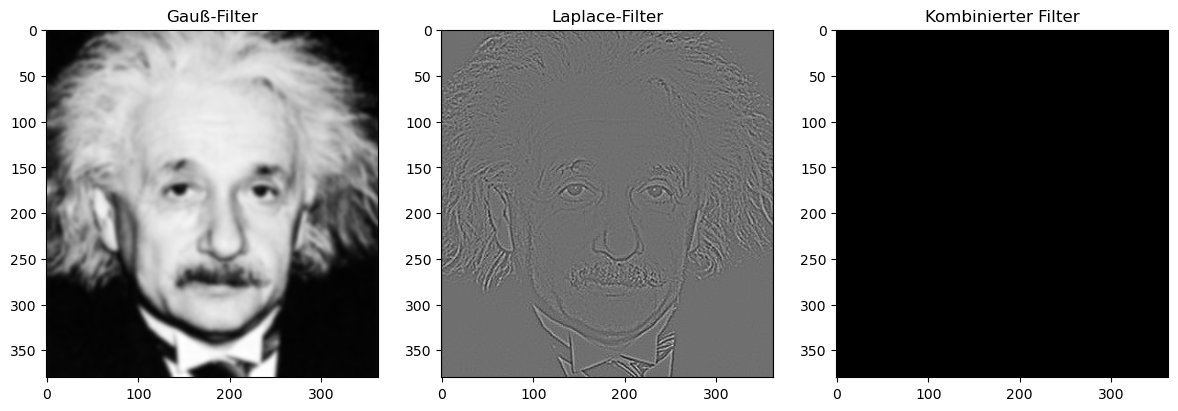

In [5]:
#Vergleich der Ergebnisse
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(gauss_filtered_image, cmap='gray')
plt.title('Gauß-Filter')

plt.subplot(132)
plt.imshow(laplace_filtered_image, cmap='gray')
plt.title('Laplace-Filter')

plt.subplot(133)
plt.imshow(filtered_image, cmap='gray')
plt.title('Kombinierter Filter')

plt.tight_layout()
plt.show()